Ciò che faremo durante lo sviluppo del progetto è cercare di prevedere prezzi e/o rendimenti del mercato azionario attraverso analisi tecnica, utilizzo di modelli autoregressivi o applicazione di reti neurali.
Gli algoritmi e i modelli di Machine Learning che utilizzeremo sono tutti orientati a previsioni sul "breve termine"; in questo notebook capiamo invece come valutare l'attuale situazione del mercato per decidere se conviene investire su un orizzonte di tempo molto ampio.

__PER CAPIRE__: ci interesse capire, in un dato momento, se le azioni sono "care" o no.

Come facciamo a dire se attualmente la borsa è cara oppure no? <br>
Abbiamo bisogno di un insieme di criteri che consentano di effettuare una valutazione equa.

__ESEMPIO__: quando si acquista un immobile, si valutano diversi criteri come metri quadri, zona, ... <br> 
Sulla base di questi si può poi valutare se il valore ad esso associato è consono oppure no.

Uno dei criteri utilizzati per valutare il valore delle azioni è il [price-earnings ratio](https://en.wikipedia.org/wiki/Price%E2%80%93earnings_ratio): consiste nel rapportare il prezzo d'acquisto dell'azione all'utile da essa generato.

__PER CAPIRE__: l'utile per azione è dato da $ \textrm{Utili per azione} = \frac{\textrm{Utile netto} - \textrm{Dividendi delle azioni privilegiate}}{\textrm{Numero medio azioni emesse in circolazione}} $, dove l'utile netto è riferito all'azienda che emette le azioni.

__NB__: spesso si pensa al caso inverso (utile per azione / prezzo per azione) come una misura di rendimento.

Il price-earnings ratio non è l'unico criterio per valutare il prezzo di un'azione.
Altri possono essere:
- prezzo su fatturato
- prezzo per azione su patrimonio netto per azione

__NB__: ricorda esempio azienda siderurgica vs google (differenza tra patrimonio netto che in realtà non è così grande come si crede)

Un altro modo per valutare se in un dato momento la borsa è "cara" è osservare i dati storici.

### Modello di Gordon

$ P = \frac{D}{r - g} $

dove $ P $ è il prezzo dell'azione, $ r $ è il tasso di rendimento atteso, $ g $ è il tasso di crescita dei dividendi.

I dividendi $ D $ sono dati da $ D = E \cdot DPR $ dove $ E $ sono gli utili (Earnings) e $ DPR $ sta per Dividend Payout Ratio.

Price-earnings ratio: $ \frac{P}{E} = \frac{DPR}{(r - g)} $

Earnings Yield: $ \frac{E}{P} = \frac{(r - g)}{DPR} $

__PER CAPIRE__: il DPR indica qual è la percentuale di utile netto che viene distribuita tra gli azionisti.

### Il CAPE ratio di Shiller

Gli economisti Shiller e Campbell hanno pubblicato uno studio nel 1996 in cui affermano che prendendo una misura del price-earnings (che sia mediata nel tempo), questa è un buon predittore di ciò che accadrà ai rendimenti delle azioni nei prossimi 10 anni.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
shiller = pd.read_excel('Shiller_CAPE.xlsx', index_col = 0, parse_dates = True)

In [13]:
shiller.head()

,SPXT,Dividend,Earnings,CPI,Date_fract,Long_rate,Real_price,Real_dividend,Real_TR_Price,Real_earnings,Real_TR_scaled_earnings,CAPE,TR_CAPE,Excess_CAPE_Yield,P/E
Data,,,,,,,,,,,,,,,
1900-01-31,6.10,0.2175,0.48,7.897091,1900.041667,3.150000,240.444365,8.573221,240.444365,18.920212,18.920212,NaN,NaN,NaN,12.708333
1900-02-28,6.21,0.2250,0.48,7.992232,1900.125000,3.145833,241.866338,8.763273,242.596611,18.694983,18.751429,NaN,NaN,NaN,12.937500
1900-03-31,6.26,0.2325,0.48,7.992232,1900.208333,3.141667,243.813732,9.055382,245.306779,18.694983,18.809465,NaN,NaN,NaN,13.041667
1900-04-30,6.34,0.2400,0.48,7.992232,1900.291667,3.137500,246.929563,9.347491,249.225417,18.694983,18.868801,NaN,NaN,NaN,13.208333
1900-05-31,6.04,0.2475,0.48,7.801942,1900.375000,3.133333,240.982851,9.874711,244.053958,19.150955,19.395017,NaN,NaN,NaN,12.583333


In [5]:
shiller.columns

Index(['SPXT', 'Dividend', 'Earnings', 'CPI', 'Date_fract', 'Long_rate',
       'Real_price', 'Real_dividend', 'Real_TR_Price', 'Real_earnings',
       'Real_TR_scaled_earnings', 'CAPE', 'TR_CAPE', 'Excess_CAPE_Yield'],
      dtype='object')

Le colonne rappresentano rispettivamente:
- SPXT - prezzo dell'indice SP500
- Dividend - dividendi pagati ogni anno
- Earnings - utili ottenuti ogni anno

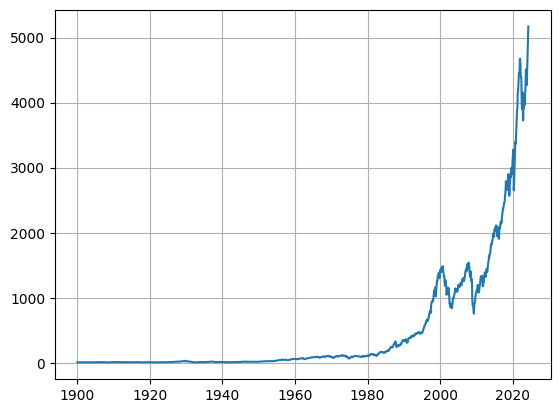

In [6]:
plt.plot(shiller['SPXT']) # andamento dei prezzi
plt.grid()

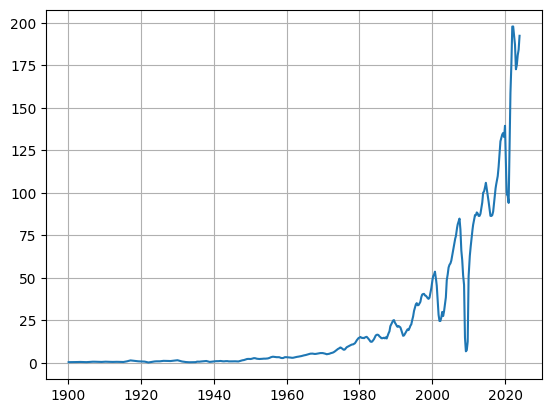

In [7]:
plt.plot(shiller['Earnings']) # andamento degli utili delle società facenti parte di SP500
plt.grid()

In [8]:
shiller['P/E'] = shiller['SPXT']/shiller['Earnings']

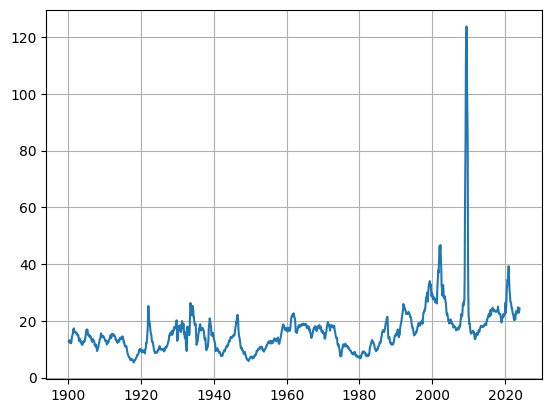

In [9]:
plt.plot(shiller['P/E'])
plt.grid()

__NB__: nel loro paper Shiller e Campbell fanno notare che il price-earnings è molto volatile. <br>
Se ad esempio i mercati crollano per cause che non hanno a che vedere con gli utili aziendali, il price-earnings che non rispecchia tale crollo. <br>
Allo stesso modo, quando dopo una crisi globale come quella del 2008 i mercati tornano a salire (ma gli utili non salgono) ci si trova con un price-earnings ratio altissimo perché l'utile rilevato nel presente non rispecchia la crescita futura.

In [10]:
gfc = shiller['2007-7-31':'2009-12-31'] # gfc sta per "great financial crysis"
gfc[['SPXT','Earnings']]

,SPXT,Earnings
Data,,
2007-07-31,1520.71,82.813333
2007-08-31,1454.62,80.706667
2007-09-30,1497.12,78.600000
2007-10-31,1539.66,74.460000
2007-11-30,1463.39,70.320000
2007-12-31,1479.22,66.180000
2008-01-31,1378.76,64.250000
2008-02-29,1354.87,62.320000
2008-03-31,1316.94,60.390000


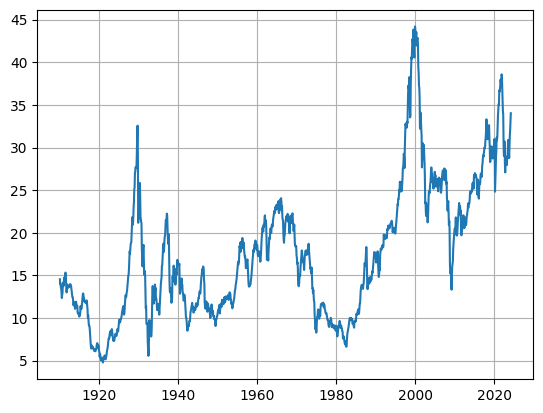

In [15]:
plt.plot(shiller['CAPE']) # rapporto prezzo utile calcolato usando una media mobile di 10 anni (deflazionata)
plt.grid()

Nel grafico sopra viene rappresentato l'andamento del CAPE, cioè il rapporto prezzo-utile calcolato usando la media mobile a 10 anni degli utili deflazionati.<br>
__CAPE__ sta per _Cyclically adjusted price-to-earnings ratio_.

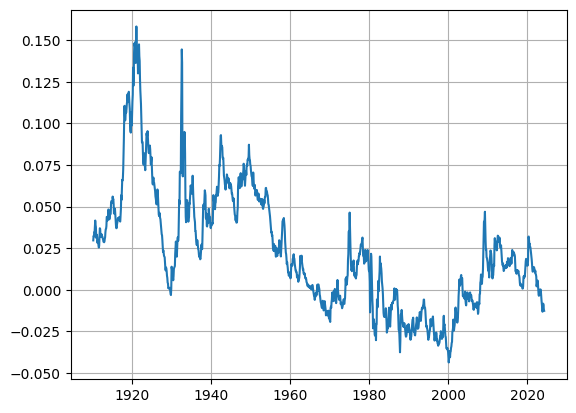

In [16]:
plt.plot(1/shiller['CAPE']-shiller['Long_rate']/100) # differenza tra earnings-yield e tasso di interesse a lungo termine
plt.grid()

#### Capacità previsiva del CAPE

https://commons.wikimedia.org/wiki/File:Price-Earnings_Ratios_as_a_Predictor_of_Twenty-Year_Returns_(Shiller_Data).png

#### Quanto sono care le borse oggi?

#### Smolyansky M. (2023) "End of an era: the coming long-run slowdown in corporate profit growth and stock returns
#### Brooks J. (2023) "Drving with the rear-view mirror: will we see a repeat of the past decade of US equity returns?"

#### Altre fonti:

http://www.econ.yale.edu/~shiller/data.htm

Campbell J.Y. - Shiller R.J. (2001) "Valuation ratios and the long-run stock market outlook: an update"

Siegel J.J. (2016) "The Shiller CAPE Ratio: A New look"